In [21]:
import joblib

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('../data/obligation_extraction_df.csv')

In [4]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=42)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
xgboost_tfidf = joblib.load('../models_pickle/xgb_tfidf.joblib')

In [10]:
preds = xgboost_tfidf.predict(df_test.sentence)

In [11]:
print(classification_report(df_test.is_obligation, preds))

              precision    recall  f1-score   support

       False       0.81      0.81      0.81      2113
        True       0.83      0.83      0.83      2371

   micro avg       0.82      0.82      0.82      4484
   macro avg       0.82      0.82      0.82      4484
weighted avg       0.82      0.82      0.82      4484



In [18]:
cf_matrix = confusion_matrix(df_test.is_obligation, preds)

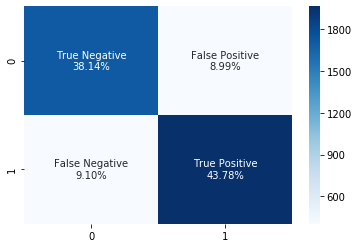

In [28]:
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [33]:
# False positives

df_test.sentence[(df_test.is_obligation != preds) & ~df_test.is_obligation].values

array(['In the event that USi is prevented or delayed in the delivery or installation of the iMAP Solution for reasons beyond its control, such delivery or installation shall take place as soon thereafter as is reasonably possible.',
       'If you are on August 31, 2005 employed by the Company you will also become on that date entitled to receive an additional annual post-retirement benefit equal to thirty percent (30%) of the average of your Management Incentive Compensation plan bonus (only – no other bonuses or compensation of any nature will be included) during the last five (5) consecutive years of your service as an employee of the Company, including, for this purpose only, all subsidiaries of the Company.',
       "Buyer agrees that, (a) except as otherwise provided or required by valid law, (b) except to the extent Buyer considers such documents or information reasonably necessary to prosecute and/or defend any claim made with respect to the Property or this Agreement, (c) exc

In [34]:
# False negatives

df_test.sentence[(df_test.is_obligation != preds) & df_test.is_obligation].values

array(['The Parties shall mutually seek a resolution of the delay or the failure to perform as noted above.',
       'Such interest shall be paid at the same time as the associated principal payment shall be made.',
       "With respect to any obligations to be performed by Tenant to Landlord, other than the payment of rent and other sums due under this Lease, except with respect to the negligence Tenant, its employees, agents or contractors, Tenant shall never be liable for failure to furnish or perform the same when prevented from doing so by strike or lockout (not limited to the Premises or the Office Park), breakdown, accident, order or regulation of or by any governmental authority, or failure of supply, or inability by the exercise of reasonable diligence to obtain supplies, parts or employees necessary to furnish such services, or because of war or other emergency, or for any act of God or other Force Majeure, as defined below, causes beyond Tenant's reasonable control, or for a